In [47]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
import statsmodels.api as sm

In [49]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [50]:
df = sm.datasets.macrodata.load_pandas().data

In [51]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [52]:
df.index = pd.to_datetime(sm.tsa.datetools.dates_from_range("1959Q1","2009Q3"))

#### Hodrick - Prescott Filter 

In [64]:
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(df.realgdp)

Text(0,0.5,'RealGDP')

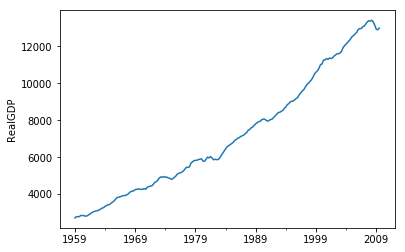

In [53]:
df["realgdp"].plot(); plt.ylabel("RealGDP")

In [54]:
df["GDP Trend"] = gdp_trend
df[["GDP Trend","realgdp"]].head(5)

,GDP Trend,realgdp
1959-03-31,2670.837085,2710.349
1959-06-30,2698.712468,2778.801
1959-09-30,2726.612545,2775.488
1959-12-31,2754.612067,2785.204
1960-03-31,2782.816333,2847.699


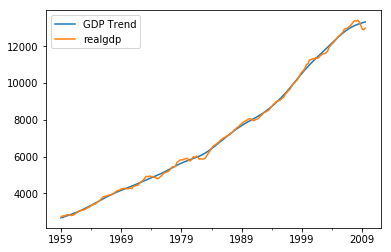

In [55]:
df[["GDP Trend","realgdp"]].plot()

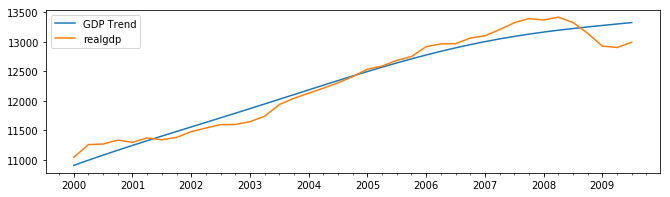

In [63]:
df[["GDP Trend","realgdp"]]["2000-01-01":].plot(figsize=(11,3))